<font size="5"> <a href="https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis=MAC0209"> MAC0209 - Modelagem e Simulação</a> </font>

Roberto M. Cesar Jr. (IME-USP)

Roberto Hirata Jr. (IME-USP)
***
<font size="5"> Resoluções de EDOs: soluções analítica e numérica pelo método de Euler </font>
***

# Método de Euler para solução de EDOs de primeira ordem

O método de Euler é uma forma de resolver numericamente uma equação diferencial ordinária. Assume-se ser conhecidas a derivada de uma função que se quer encontrar ("resolver") e um valor inicial da equação a ser integrada. Por exemplo, no caso do movimento uniformemente acelerado:$$a=\mbox{constante}, b=\mbox{constante}$$

$$v(t) = x'(t) = \frac{dx(t)}{dt} = 2at + b$$ $$x(0)=0$$

A ideia do método de Euler é substituir a derivada por uma aproximação de Taylor, desprezando-se os termos maiores que segunda ordem. Isto é:

$$x'(t)\sim \frac{x(t+\Delta t)-x(t)}{\Delta t}  = 2at + b$$

Portanto, podemos escrever

$$ x(t+\Delta t) = x(t) + \Delta t (2at + b) $$

Isso permite implementar o algoritmo de Euler para calcular a posição futura $x(t+\Delta t)$ a partir da posição atual $x(t)$. Nesse caso, $a, b, \Delta t$ são parâmetros de entrada, bem como a posição inicial $x(0) = 0$.

Observamos que, para esse caso, é possível calcular a solução $x(t)$ analiticamente:

$$v(t) = x'(t) = \frac{dx(t)}{dt} = 2at + b \Rightarrow x(t) = a t^2 + bt + c$$

# Implementando o método de Euler



Para a implementação ficar organizada, crie duas funções:
- nextXeuler(x,t,params,dt): que recebe um vetor de parâmetros iniciais, params, o tempo e a posição atual, t e x, respectivamente, e o delta de tempo, dt (note que com isso desacoplamos os índices do incremento). A função retorna a nova posição $x(t + \Delta t)$ conforme explicado acima.
- nextXa(t,params): que recebe um vetor de parâmetros iniciais, params, e o tempo atual. A função retorna a nova posição $x_t$ de acordo com a equação integrada analiticamente: $ x(t) = at^2 + bt + c $.

params pode ser implementada como uma lista $[a,b,c]$.

Crie uma função main que itera essas duas funções entre os tempos 0s e 2s (com um dt de 0.1s) calcula e imprime a diferença absoluta entre elas (erro) e as grafique.


Erro:  0
Erro:  0.009999999999999981
Erro:  0.01999999999999999
Erro:  0.02999999999999997
Erro:  0.040000000000000036
Erro:  0.050000000000000044
Erro:  0.06000000000000005
Erro:  0.07000000000000006
Erro:  0.08000000000000007
Erro:  0.0900000000000003
Erro:  0.10000000000000053
Erro:  0.11000000000000032
Erro:  0.1200000000000001
Erro:  0.12999999999999945
Erro:  0.13999999999999924
Erro:  0.14999999999999858
Erro:  0.15999999999999837
Erro:  0.16999999999999815
Erro:  0.17999999999999794
Erro:  0.18999999999999773


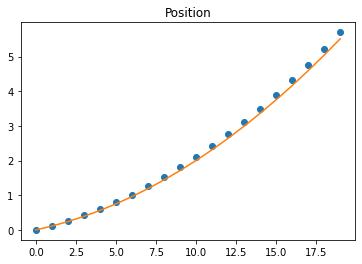

In [ ]:
# Implementa o exercício da integração de Euler de dx(t)/dt = 2at + b

import math
import matplotlib.pyplot as pyplot

def nextXeuler(x,t,params,dt):
    v = 2*params[0]*t + params[1]
    return (x+v*dt)

def nextXa(t,params):
    return (params[0]*t*t + params[1]*t + params[2])

def main():
    t=0
    tf = 2
    dt=0.1
    x=0
    params = [1,1,x]
    vxa=[]
    vxe=[]
    while (t<tf):
        xa = nextXa(t,params)
        vxa.append(xa)
        vxe.append(x)
        print('Erro: ', abs(x - xa)) #erro
        t += dt
        x = nextXeuler(x,t,params,dt)

    pyplot.figure(0)
    pyplot.plot(vxe,label='Euler',linestyle='',marker='o')
    pyplot.plot(vxa,label='Analytical')
    pyplot.title('Position')
    pyplot.show(block=False)

main()

# Exercício usando uma EDO de segunda ordem

Escreva a solução para a EDO:

$ \frac{d^2x}{dt^2} = 6t$



In [ ]:
# Escreva sua solucao aqui.

Depois de ter escrito sua solução, compare com a resolução abaixo:


Erro:  0
Erro:  0.005000000000000002
Erro:  0.016000000000000007
Erro:  0.033
Erro:  0.05600000000000001
Erro:  0.08500000000000005
Erro:  0.1200000000000001
Erro:  0.1610000000000002
Erro:  0.2080000000000003
Erro:  0.26100000000000045
Erro:  0.3200000000000006


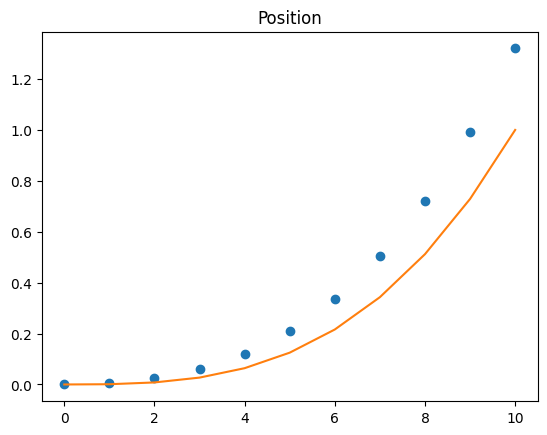

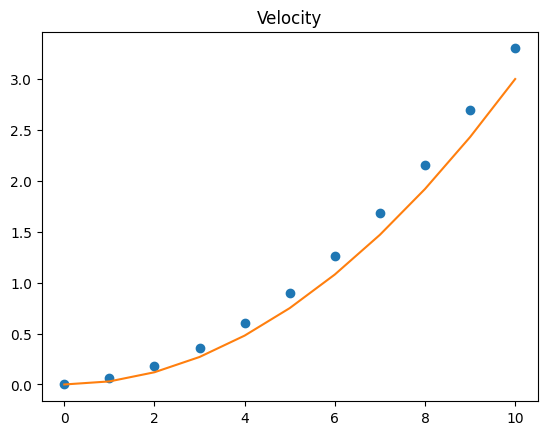

In [ ]:
# d2x / dt2 = 6t

import math
import matplotlib.pyplot as pyplot

def nextXeuler(x,v,dt):
    return x+v*dt

def nextVeuler(v,t,dt):
    return v + (6*t*dt)

def nextVa(t):
    return 3*(t**2)

def nextXa(t):
    return t**3

def main():
    t=0
    tf = 1
    dt=0.1
    x=0
    v=0
    vva=[]
    vxa=[]
    vve=[]
    vxe=[]
    while (t<tf):
        vva.append(nextVa(t))
        vxa.append(nextXa(t))
        vve.append(v)
        vxe.append(x)
        print('Erro: ', x - nextXa(t)) #erro
        t += dt
        v = nextVeuler(v,t,dt)
        x = nextXeuler(x,v,dt)

    pyplot.figure(0)
    pyplot.plot(vxe,label='Euler',linestyle='',marker='o')
    pyplot.plot(vxa,label='Analytical')
    pyplot.title('Position')
    pyplot.show(block=False)

    pyplot.figure(1)
    pyplot.plot(vve,label='Euler',linestyle='',marker='o')
    pyplot.plot(vva,label='Analytical')
    pyplot.title('Velocity')
    pyplot.show()


main()